## COMP41680 Assignment 1 - Task 2 : Data Preparation and Analysis

### Name: Sanika Kulkarni
### Student ID: 21200060

## Analysis of The Movies Database (TMDB)

The TMDB data set contains information about 10,000 movies collected from [The Movie Database](https://www.themoviedb.org/about) (TMDb). The movies scraped are top rated movies on TMDB. This analysis explores the dataset to find interesting patterns and examines the factors that impact the success of movies.

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ast import literal_eval
import math
from datetime import datetime
import warnings
import calendar
warnings.filterwarnings('ignore')
%matplotlib inline

## Reading the data

The data has already been stored in a csv file after scraping it. This can be read using the pandas `read_csv()` function. We can see that it contains information about 9760 movies and it has 29 columns that give information about those movies.

Observations from the dataset:
- We will consider currency as dollar since it is the most used international currency
- There are a few columns that do not seem useful
- There is a need to perform preprocessing to make columns like genres useful for analysis

In [2]:
movies = pd.read_csv("movies_df.csv")
movies.head()

,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,...,status,tagline,title,video,vote_average,vote_count,belongs_to_collection.id,belongs_to_collection.name,belongs_to_collection.poster_path,belongs_to_collection.backdrop_path
0,False,/wPU78OPN4BYEgWYdXyg0phMee64.jpg,NaN,25000000,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",NaN,278,tt0111161,en,The Shawshank Redemption,...,Released,Fear can hold you prisoner. Hope can set you f...,The Shawshank Redemption,False,8.7,20990,NaN,NaN,NaN,NaN
1,False,/90ez6ArvpO8bvpyIngBuwXOqJm5.jpg,NaN,13200000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,19404,tt0112870,hi,दिलवाले दुल्हनिया ले जायेंगे,...,Released,"Come Fall In love, All Over Again..",Dilwale Dulhania Le Jayenge,False,8.7,3519,NaN,NaN,NaN,NaN
2,False,/rSPw7tgCH9c6NqICZef4kZjFOQ5.jpg,NaN,6000000,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",http://www.thegodfather.com/,238,tt0068646,en,The Godfather,...,Released,An offer you can't refuse.,The Godfather,False,8.7,15684,230.0,The Godfather Collection,/9Baumh5J9N1nJUYzNkm0xsgjpwY.jpg,/3WZTxpgscsmoUk81TuECXdFOD0R.jpg
3,False,/lp6SmwyNRspEYkkLXFEVuNlCw77.jpg,NaN,0,"[{'id': 16, 'name': 'Animation'}, {'id': 14, '...",https://www.netflix.com/title/81193214,533514,tt8652818,ja,劇場版 ヴァイオレット・エヴァーガーデン,...,Released,NaN,Violet Evergarden: The Movie,False,8.7,202,NaN,NaN,NaN,NaN
4,False,/v5CEt88iDsuoMaW1Q5Msu9UZdEt.jpg,NaN,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 18, ...",https://www.gaga.co.jp/intls/youreyestell/,730154,tt11051974,ja,きみの瞳が問いかけている,...,Released,NaN,Your Eyes Tell,False,8.7,269,NaN,NaN,NaN,NaN


In [3]:
movies.shape

(9760, 29)

In [4]:
movies.columns

Index(['adult', 'backdrop_path', 'belongs_to_collection', 'budget', 'genres',
       'homepage', 'id', 'imdb_id', 'original_language', 'original_title',
       'overview', 'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count', 'belongs_to_collection.id',
       'belongs_to_collection.name', 'belongs_to_collection.poster_path',
       'belongs_to_collection.backdrop_path'],
      dtype='object')

# Data Cleaning

I will be exploring my data to see what exactly the data conatins and to determine the necessary data cleaning steps. After that, I will continue with data preprocessing and further analysis. 

- Removing the duplicate rows (if any).
- Some movies in the database have zero budget or zero revenue and needs imputation. I will be replacing zero with median values in runtime column, revenue and budget columns.
- Changing release date column into date format and extracting month and year.
- Changing format of genres, production companies and production countries column

## Keeping the relevant columns

On eyeballing, I can see that there are some columns that I will surely not be using in my analysis. This includes the columns like 'imdb_id' or 'poster_path'. I am going to keep only the relevant columns before I begin my analysis and data exploration. 

In [5]:
movies = movies[["title","adult","budget","genres","original_language","original_title","overview","popularity",
                 "production_companies","production_countries","release_date","revenue","runtime","status",
                 "vote_average","vote_count"]]

In [6]:
movies.shape

(9760, 16)

The dataframe now contains 9760 rows and 16 columns

## Checking Data types of Each Column

There are a few features with numerical values. These include:
- budget
- popularity
- revenue
- runtime
- vote_average
- vote_count

The feature 'adult' is the only column with boolean values. Rest of the features are categorical, or of 'object' data type.

In [7]:
movies.dtypes

title                    object
adult                      bool
budget                    int64
genres                   object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                   int64
status                   object
vote_average            float64
vote_count                int64
dtype: object

## Checking missing values

Since the TMDB is a user made dataset, it can contain missing values. We can see that the column with missing values is "overview" and the films are also of low popularity and form a very small chunk of data. Hence, we can safely drop these rows.

In [8]:
movies.isna().sum()

title                    0
adult                    0
budget                   0
genres                   0
original_language        0
original_title           0
overview                17
popularity               0
production_companies     0
production_countries     0
release_date             0
revenue                  0
runtime                  0
status                   0
vote_average             0
vote_count               0
dtype: int64

In [9]:
movies[movies["overview"].isna()][["title","popularity"]]

,title,popularity
3992,Nati stanchi,6.622
4303,La matassa,6.828
5674,Fantozzi Still Suffers,11.940
6351,Anche se è amore non si vede,5.766
6592,Would I Lie to You? 2,9.777
7618,Tanguy,7.140
8946,Incognito,6.975
9149,Arrivano i prof,8.345
9258,Lightning Strike,6.078
9430,A spasso nel tempo - L'avventura continua,6.188


In [10]:
# Dropping the rows with NA values
movies = movies[movies['overview'].notna()]
movies.shape 

(9743, 16)

The new dataframe now contains 9743 films.

### Exploring Numerical data
### Print concise summary of the numerical features of the dataset

In [11]:
movies.describe()

,budget,popularity,revenue,runtime,vote_average,vote_count
count,9.743000e+03,9743.000000,9.743000e+03,9743.000000,9743.000000,9743.000000
mean,2.112449e+07,37.243511,6.212962e+07,104.822334,6.591943,1527.005029
std,3.706962e+07,191.806178,1.508748e+08,22.776212,0.809256,2593.585812
min,0.000000e+00,0.600000,0.000000e+00,0.000000,3.700000,200.000000
25%,0.000000e+00,12.987000,0.000000e+00,93.000000,6.000000,316.500000
50%,5.000000e+06,18.301000,8.084148e+06,103.000000,6.600000,583.000000
75%,2.500000e+07,30.907500,5.506044e+07,116.000000,7.200000,1435.000000
max,3.800000e+08,13178.401000,2.847246e+09,366.000000,8.700000,31157.000000


- We can see that the popularity ranges from 0.6 to 10728 with average being 33. 
- The runtime of movies in this dataset range from 0 mins to 366 mins. Surely there cannot be films having 0 mins runtime and requires further analysis

### Box plot for better visualization of skewness of Runtime of top rated movies

By looking at both the plot and calculations, we can conclude that:
- 25% of movies have a runtime of less than 93 minutes 
- 50% of movies have a runtime of less than 103 minutes i.e 1 hr 43 mins (median) 
- 75% of movies have a runtime of less than 116 minutes i.e. 1 hr 56 mins

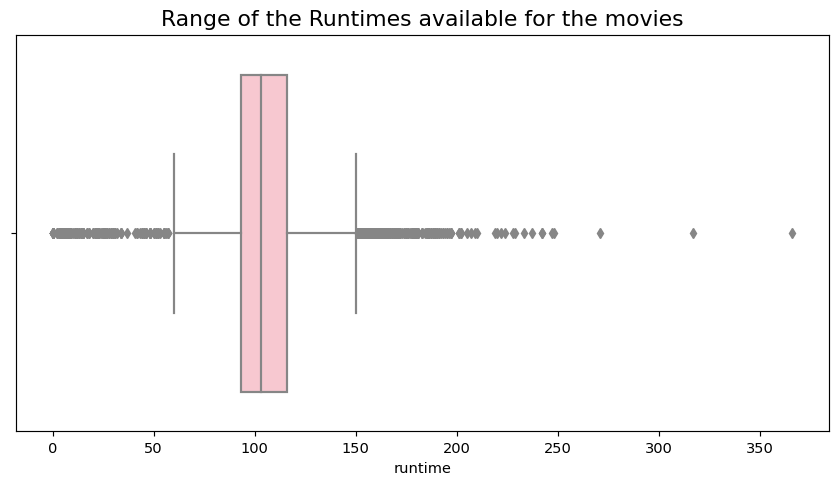

In [12]:
plt.figure(figsize=(10,5), dpi = 105)
plt.title('Range of the Runtimes available for the movies',size=15)
sns.boxplot( x=movies["runtime"],color = 'pink' );
plt.show()

### Movies with 0 minutes as their Runtime

In [13]:
movies[movies["runtime"]==0][["title","budget","revenue"]]

,title,budget,revenue
5762,Amiche da morire,0,0
7469,Three Perfect Daughters,0,0
7555,Out of the Blue,0,0
7602,Sconnessi,0,0
8247,The Full House,0,0
8324,Poveri ma ricchissimi,0,0
8413,Playmobil: The Movie,75000000,0
8838,Torno indietro e cambio vita,0,0
8914,Looking for Teddy,0,0
9157,"Cetto c'è, senzadubbiamente",0,0


**We see the the movies with 0 runtime have 0 budget and 0 revenue in most cases.** This means that the entry is  made because of data unavalability. 

We can deal with this in one of the following ways:
- Checking out information about these movies and imputing missing values manually.
- Imputing missing values by taking median of column.
- Dropping the rows

### Movies with Zero budget

In [14]:
movies[movies["budget"]==0][["title","budget","revenue"]]

,title,budget,revenue
3,Violet Evergarden: The Movie,0,20339624
4,Your Eyes Tell,0,0
6,Dou kyu sei – Classmates,0,0
7,Gabriel's Inferno Part II,0,0
9,Gabriel's Inferno,0,0
...,...,...,...
9749,Wounds,0,0
9751,Fuga da Reuma Park,0,0
9755,Fuga di cervelli,0,0
9757,The Human Centipede 3 (Final Sequence),0,16184


### Movies with Zero Revenue

In [15]:
movies[movies["revenue"]==0][["title","budget","revenue"]]

,title,budget,revenue
4,Your Eyes Tell,0,0
6,Dou kyu sei – Classmates,0,0
7,Gabriel's Inferno Part II,0,0
9,Gabriel's Inferno,0,0
10,Gabriel's Inferno Part III,0,0
...,...,...,...
9751,Fuga da Reuma Park,0,0
9752,Troll 2,65000,0
9753,Olé,2200000,0
9755,Fuga di cervelli,0,0


In [16]:
print("Movies with zero budget: ",movies[movies["budget"]==0]["title"].count())
print("Movies with zero revenue: ",movies[movies["revenue"]==0]["title"].count().sum())
print("Movies with zero runtime: ",movies[movies["runtime"]==0]["title"].count().sum())

Movies with zero budget:  3531
Movies with zero revenue:  3239
Movies with zero runtime:  11


We can see that:
- There are about 3000 movies with zeros in the budget and revenue column. 
- Also, a zero budget does not indicate no revenue. 
- Since filling out budget for all these movies manually would be too cumbersome, I am going to impute these movies by the median value for that column. 
- Note that we cannot drop these rows as they form a significant chunk of the total movies in the dataset.

In [17]:
movies['budget']=movies['budget'].replace(0,movies['budget'].median())
movies['revenue']=movies['revenue'].replace(0,movies['revenue'].median())
movies['runtime']=movies['runtime'].replace(0,movies['runtime'].median())

In [18]:
# QC - Checking if the operations are performed well
print("Movies with zero budget: ",movies[movies["budget"]==0]["title"].count().sum())
print("Movies with zero revenue: ",movies[movies["revenue"]==0]["title"].count().sum())
print("Movies with zero runtime: ",movies[movies["runtime"]==0]["title"].count().sum())

Movies with zero budget:  0
Movies with zero revenue:  0
Movies with zero runtime:  0


## Univariate and Bivariate analysis of popularity and vote_average columns
There are two columns that determine movie ratings - popularity and vote_average.
Univariate and bivariate analysis of these columns will help me determine which column to use.

### Visualization of Average Votes Column

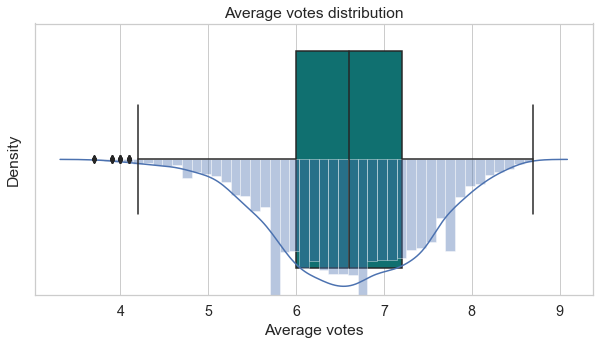

In [19]:
sns.set(rc={'figure.figsize':(10,5)}, font_scale=1.3)
temp_df = movies[["vote_average"]]
sns.set_style("whitegrid")
ax = sns.distplot(temp_df.vote_average)
ax = sns.boxplot(x = temp_df.vote_average,color = 'teal')
ax.set(xlabel='Average votes', title = 'Average votes distribution')
plt.show()


### Visualization of Popularity Column

In [20]:
# Printing movies with popularity over 8000
print("Number of movies above 150 popularity:",movies[movies['popularity']>150]["title"].count())
print("This forms just the ",round(((movies[movies['popularity']>150]["title"].count()/len(movies))*100),2),"% of the total films")

Number of movies above 150 popularity: 237
This forms just the  2.43 % of the total films


#### Hence, for better visualization, creating plot for values below 150 

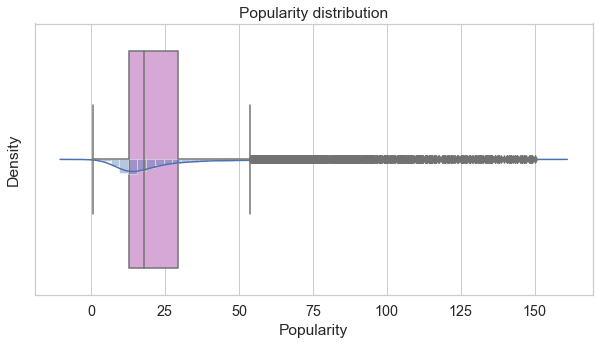

In [21]:
pop_below_150 = movies[movies['popularity']<150]
sns.set(rc={'figure.figsize':(10,5)}, font_scale=1.3)
temp_df = pop_below_150[['popularity']]
sns.set_style("whitegrid")
ax = sns.distplot(temp_df.popularity)
ax = sns.boxplot(x = temp_df.popularity,color = 'plum')
ax.set(xlabel='Popularity', title = 'Popularity distribution')
plt.show()

### Checking vote_average for popular movies

In [22]:
movies[movies['popularity']>1200][["title","vote_average"]]

,title,vote_average
122,Spider-Man: No Way Home,8.2
173,Sing 2,8.2
396,The Batman,7.9
784,Encanto,7.7
1352,Turning Red,7.5
2475,Eternals,7.2
2828,Nightmare Alley,7.1
2893,The Ice Age Adventures of Buck Wild,7.1
2912,The Adam Project,7.1
3073,Hotel Transylvania: Transformania,7.0


In [23]:
movies[movies['popularity']<3][["title","vote_average"]].head()

,title,vote_average
30,Hotarubi no Mori e,8.5
35,Grave of the Fireflies,8.4
629,Lisbela and the Prisoner,7.8
2323,Toy Story of Terror!,7.2
3105,X2,7.0


### Correlation between vote_average and popularity

We can see that there is a very slight positive correlation between the two columns

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


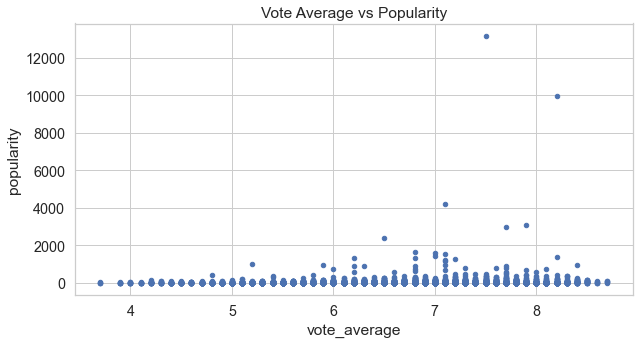

In [24]:
movies.plot(x='vote_average',y='popularity',kind='scatter')
plt.title('Vote Average vs Popularity')
plt.show()

### Observations and Insights:

**Univariate Analysis**
- We see that the popularity column has values clustered below 50 and vote averages are clustered near 6.5, with maximum being near 9
- The vote averages are evenly spread and have less outliers compared to the popularity values
- There are very few values of popularity that go above 150. However, these do not seem to be incorrect data points as movies like 'Spider-Man: No Way Home' have been extremely popular

**Bivariate Analysis**
- There are however movies that do not have a good popularity score but seem to have a good 'vote_average'. 
- The movies that fall under this includes the likes of 'Home Alone' and 'Grave of the Fireflies' which have IMDB Ratings of 7.7 and 8.5 out of 10 respectively (as per my research)
- One reason for this could be that the older movies have less popularity than the newer movies amongst the TMDB Community members or younger crowd. TMDB was created around 2008, which is quite recent.
- Another reason for this can be that the movies were popular in certain countries but the community that actively contributes to TMDB might not be from that region

**Due to above mentioned reasons, I am going to consider vote_averages to be the column deciding movie ratings.**

## Preprocessing the necessary columns

- Convert string object to list object in Pandas DataFrame
- Only select necessary info within the list object and create a clean column
 - We can use python’s inline list iterator and lamda function to generate this object for each row. 
 - I am also going to check the case where the column is not a list and return an empty list for those cases, if any
- Converting the list back to string for easy access to plot graphs

In [25]:
def pre_process_dict_col(column):
    # Converting the string object to list object
    column = column.apply(literal_eval)
    
    # Select necessary info within the list object and create a clean column 
    column = column.apply(lambda x: [el['name'] for el in x] if isinstance(x,list) else [])
    
    # First remove the brackets, then remove the quotes and finally the space after the commas
    column = column.astype(str).str[1:-1].str.replace("'", "").str.replace(", ", ",")
    return column

In [26]:
movies['production_countries'] = pre_process_dict_col(movies["production_countries"])
movies['production_companies'] = pre_process_dict_col(movies["production_companies"])
movies['genres'] = pre_process_dict_col(movies["genres"])

In [27]:
# Verifying the changes by printing records
print(movies.iloc[2]['production_companies'])
print(movies.iloc[190]['production_countries'])

Paramount,Alfran Productions
United States of America


## Manipulating the Release Date column

In [28]:
movies.release_date = pd.to_datetime(movies['release_date'])
movies["release_date"].head()

0   1994-09-23
1   1995-10-20
2   1972-03-14
3   2020-09-18
4   2020-10-23
Name: release_date, dtype: datetime64[ns]

## Extracting Release Year and Month

In [29]:
movies['Release_year'] = pd.DatetimeIndex(movies['release_date']).year
movies['Release_year'].head()

0    1994
1    1995
2    1972
3    2020
4    2020
Name: Release_year, dtype: int64

In [30]:
movies['Release_month'] = pd.DatetimeIndex(movies['release_date']).month
movies['Release_month'].head()

0     9
1    10
2     3
3     9
4    10
Name: Release_month, dtype: int64

In [31]:
movies['Release_month'] = movies['Release_month'].apply(lambda x: calendar.month_abbr[x])
movies['Release_month']

0       Sep
1       Oct
2       Mar
3       Sep
4       Oct
       ... 
9755    Nov
9756    Oct
9757    May
9758    Oct
9759    Dec
Name: Release_month, Length: 9743, dtype: object

## Checking the unique values per column

In [32]:
print(movies.apply(lambda col: col.nunique()))

title                   9411
adult                      1
budget                   802
genres                  2096
original_language         42
original_title          9481
overview                9741
popularity              8551
production_companies    8203
production_countries     893
release_date            5973
revenue                 6247
runtime                  202
status                     1
vote_average              50
vote_count              3119
Release_year             109
Release_month             12
dtype: int64


In [33]:
print("Unique value of status column: ",movies["status"].unique())
print("Unique value of adult column: ",movies["adult"].unique())

Unique value of status column:  ['Released']
Unique value of adult column:  [False]


- The only value of "status" column is "released".This is obvious from the fact that the dataset is of 'top rated movies'. 
- All the movies are non-adult movies.

**Since `status` and `adult` columns have only one value, they can be dropped as they add no value to the analysis.** 

In [34]:
# Dropping the reduandant columns
movies.drop(['adult','status'],axis =1,inplace = True)

## Checking Duplicate entries

There are no duplicates.

In [35]:
movies.duplicated().any()

False

### Checking if title is same as original_title

There are some movies with same title but in different languauges. However, we do not need this column for analysis. We can drop the column

In [36]:
movies[movies["title"]!=movies["original_title"]][["title","original_title"]]

,title,original_title
1,Dilwale Dulhania Le Jayenge,दिलवाले दुल्हनिया ले जायेंगे
3,Violet Evergarden: The Movie,劇場版 ヴァイオレット・エヴァーガーデン
4,Your Eyes Tell,きみの瞳が問いかけている
6,Dou kyu sei – Classmates,同級生
11,Your Name.,君の名は。
...,...,...
9663,Dragon Wars,디 워
9670,The Mother of Tears,La terza madre
9680,All Ladies Do It,Così fan tutte
9736,The Visitors: Bastille Day,Les Visiteurs: La Révolution


In [37]:
movies.drop(['original_title'],axis =1,inplace = True)

In [38]:
movies.shape

(9743, 15)

# Exploratory Data Analysis

In this section, I have focussed on answering the following questions:
- Which are the most popular genre?
- Which movies are most popular according to TMDB community?
- Which are the movies with maximum budget? Are those the same that generate maximum revenue?
- Which movies are most profitable?
- Is profit correlated with budget and revenue?
- How does runntime of top rated movies vary? 
- Are there any months a 'peak season' for movie releases?
- Which production companies are most popular?

Answers to these questions will help us gain insight into what makes a film a top rated movie.
I have also added some extra analysis apart from the above mentioned questions.

## Visualizing Movies and Genre

- The `genre` column values are comma separated strings since one movie can belong to multiple genre. 
- We need further processing to plot a graph to find total number of movies belonging to a genra.

## 1. Top Genres based on Number of Movies

In [39]:
# To find count of movies per genra
def split_string(column):
    data = movies[column].str.cat(sep = ',')
    data = pd.Series(data.split(','))
    count = data.value_counts(ascending = False)
    return count

Text(0.5, 1.0, 'Top Genres')

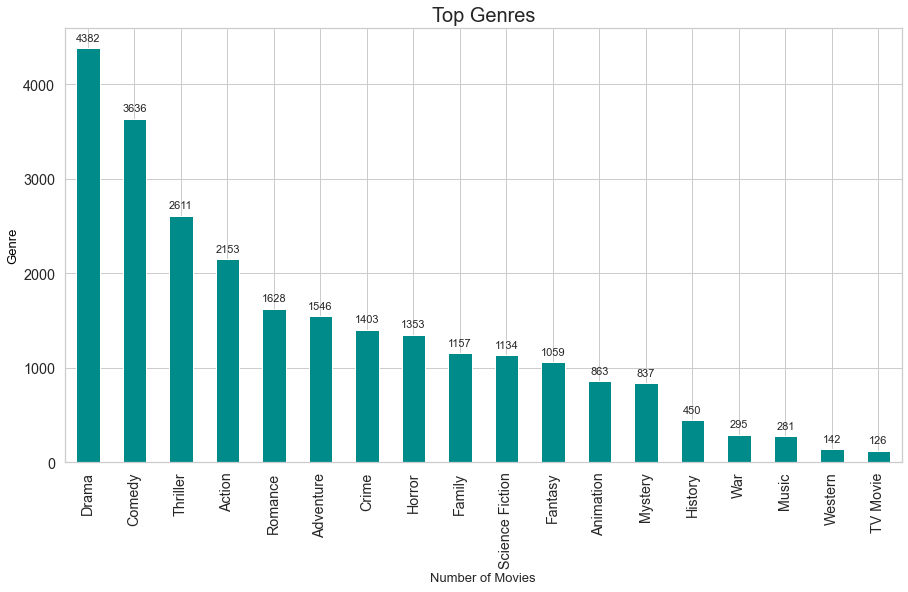

In [40]:
count_genre = split_string('genres')
count_genre = count_genre[0:18]
count_genre.head()

plt_genre = count_genre.plot(kind="bar",color="darkcyan")
plt_genre.figure.set_size_inches(15, 8)

plt_genre.set_ylabel('Genre', color = 'black', fontsize = '13')
plt_genre.set_xlabel('Number of Movies', fontsize = '13')

#To add data labels
for p in plt_genre.patches:
    plt.annotate(p.get_height(), (p.get_x() + p.get_width() / 2, p.get_height()), ha = 'center', va = 'center', fontsize = 11, xytext = (0, 10), textcoords = 'offset points')

plt.title("Top Genres",size=20)

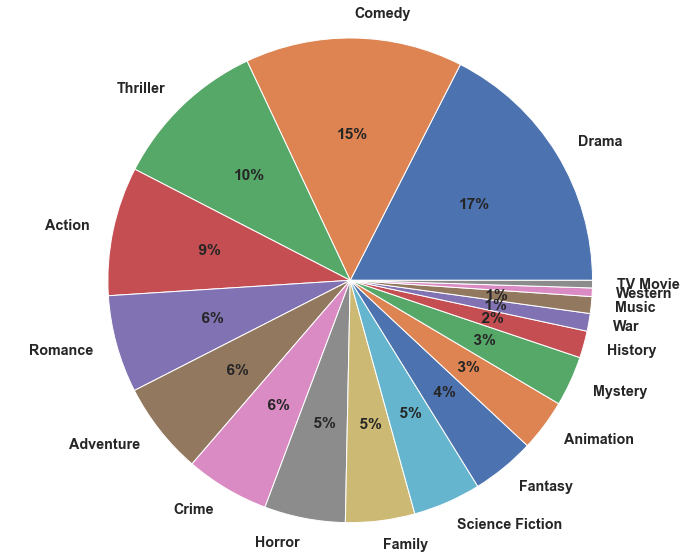

In [41]:
genre_count = []
i = 0
for genre in count_genre.index:
    genre_count.append([genre, count_genre[i]])
    i += 1
    

f, ax = plt.subplots(figsize=(10, 8))

genre_count.sort(key = lambda x:x[1], reverse = True)
labels, sizes = zip(*genre_count)

plt.rc('font', weight='bold')
ax.pie(sizes, labels=labels,
       autopct = lambda x:'{:2.0f}%'.format(x) if x > 1 else '',
       shadow=False, startangle=0)


ax.axis('equal')
plt.tight_layout()


**We can see that the most number of top rated movies belong to the following genre:**
- Drama
- Comedy
- Thriller
- Action

**The least popular Genres are:**
- TV Movie
- Western
- Music
- War
- History

## 2. Top movies based on Popularity

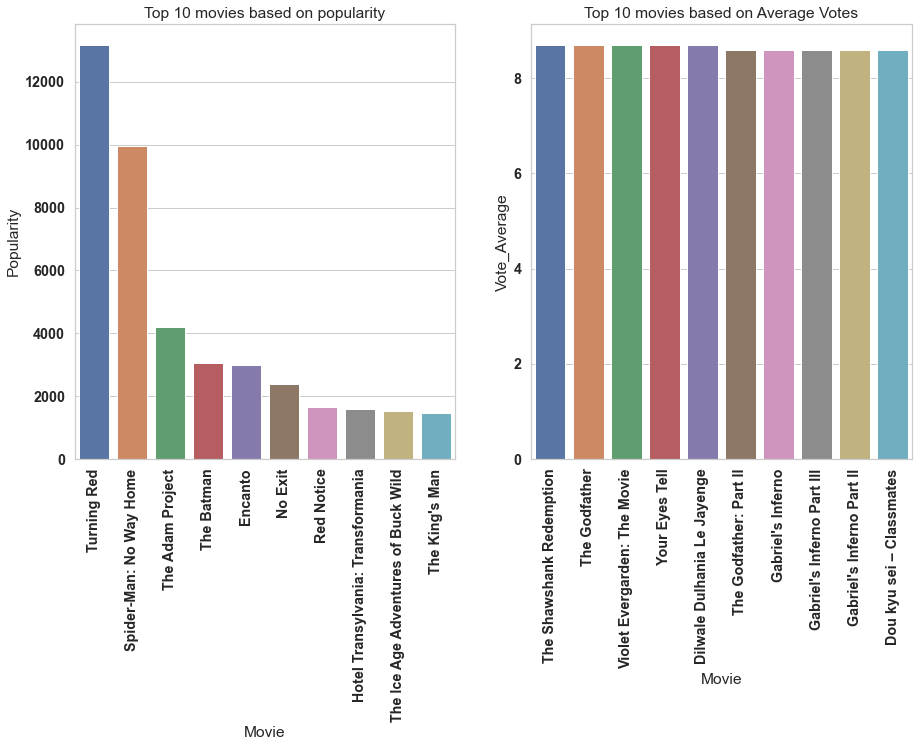

In [42]:
# Top 10 movies with the highest popularity  
# I will use popularity since the I wish to know the movies tmdb community finds interesting

movies_popularity = movies[['title','popularity']]
movies_popularity_vote = movies[['title','vote_average']]

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,8))

ax = sns.barplot(
    x = movies_popularity.sort_values(by="popularity", ascending=False).head(10).title, 
    y = movies_popularity.sort_values(by="popularity", ascending=False).head(10).popularity, ax = ax1)


ax.set(xlabel='Movie', ylabel='Popularity', title = 'Top 10 movies based on popularity')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax = sns.barplot(
    x = movies_popularity_vote.sort_values(by="vote_average", ascending=False).head(10).title, 
    y = movies_popularity_vote.sort_values(by="vote_average", ascending=False).head(10).vote_average, ax = ax2)


ax.set(xlabel='Movie', ylabel='Vote_Average', title = 'Top 10 movies based on Average Votes')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

We see that the popular movies based on average votes popularity are different. The tmdb popularity focuses on recent movies rather than the top rated older movies 

## 3. Average Vote Count per Decade
We see that maximum people have voted for the movies after 1990s, thus explaining the difference in the top 10 movies based on vote_average and popularity column

In [43]:
def extract_decade(x):
    return str(math.floor(x/10)*10)+"s"

In [44]:
movies["decade"] = movies["Release_year"].apply(extract_decade)
temp_df = movies
temp_df = temp_df.sort_values(by=['decade'], ascending=True)
df_by_vote = temp_df.groupby(['decade']).vote_count.mean().reset_index()

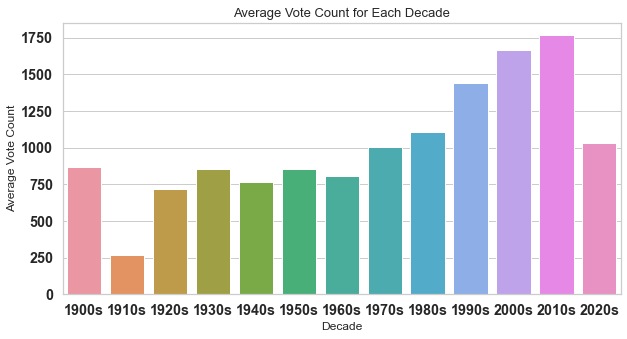

In [45]:
ax = sns.barplot(x=df_by_vote['decade'], y=df_by_vote['vote_count'])
ax.set_title("Average Vote Count for Each Decade",fontsize=13)
ax.set_xlabel("Decade",fontsize=12)
ax.set_ylabel("Average Vote Count",fontsize=12)

plt.show()

## 4. Plotting Top Movies based on Budget and Revenue

We see that movies with maximum budget and revenue are different

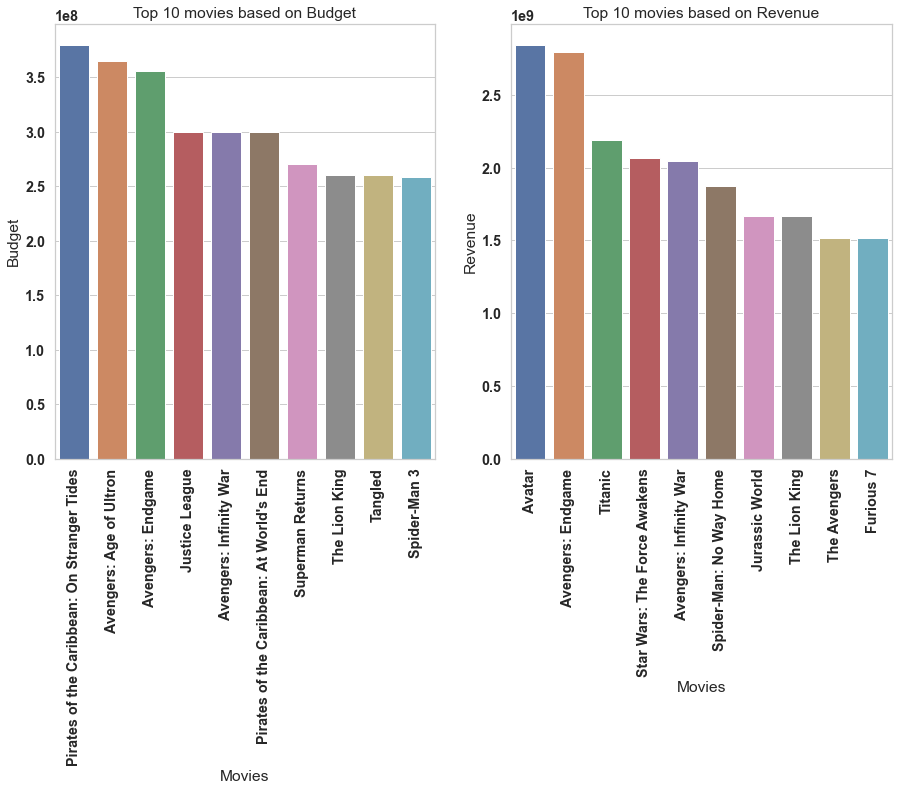

In [46]:
# Creating Subplots
 
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,8))


# Plot for top movies based on Revenue
movies_budget = movies[['title','budget']]

ax = sns.barplot(
    x = movies_budget.sort_values(by="budget", ascending=False).head(10).title, 
    y = movies_budget.sort_values(by="budget", ascending=False).head(10).budget, ax = ax1)

ax.set(xlabel='Movies', ylabel='Budget', title = 'Top 10 movies based on Budget')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)


movies_revenue = movies[['title','revenue']]


# Plot for top movies based on Revenue

ax = sns.barplot(
    x = movies_revenue.sort_values(by="revenue", ascending=False).head(10).title, 
    y = movies_revenue.sort_values(by="revenue", ascending=False).head(10).revenue, ax = ax2)

ax.set(xlabel='Movies', ylabel='Revenue', title = 'Top 10 movies based on Revenue')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)



plt.show()

##  5. Longest Movies 

The 1960s and 1910s saw the longest movies. The runtime however seems to be aroung 100 mins for most successful movies after the 2000s.

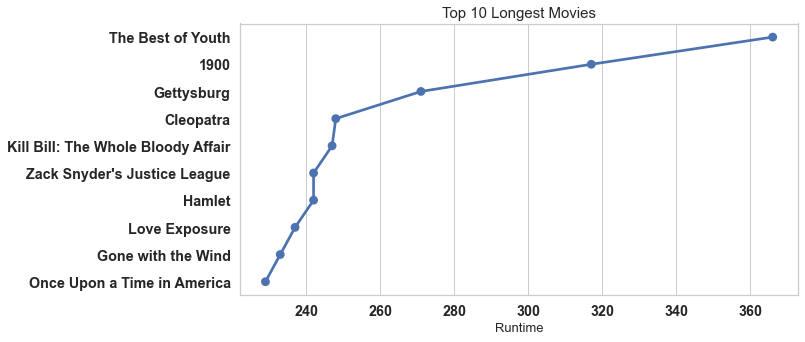

In [47]:

data_temp = pd.DataFrame(movies['runtime'].sort_values(ascending = False))
data_temp['title'] = movies['title']
data = list(map(str,(data_temp['title'])))

#extract the top 10 longest duraton films 
x = list(data[:10])
y = list(data_temp['runtime'][:10])

#make the point plot 
ax = sns.pointplot(x=y,y=x)
sns.set(rc={'figure.figsize':(10,10)})
ax.set_title("Top 10 Longest Movies",fontsize = 15)
ax.set_xlabel("Runtime",fontsize = 13)
sns.set_style("darkgrid")

## Average Runtime per Decade

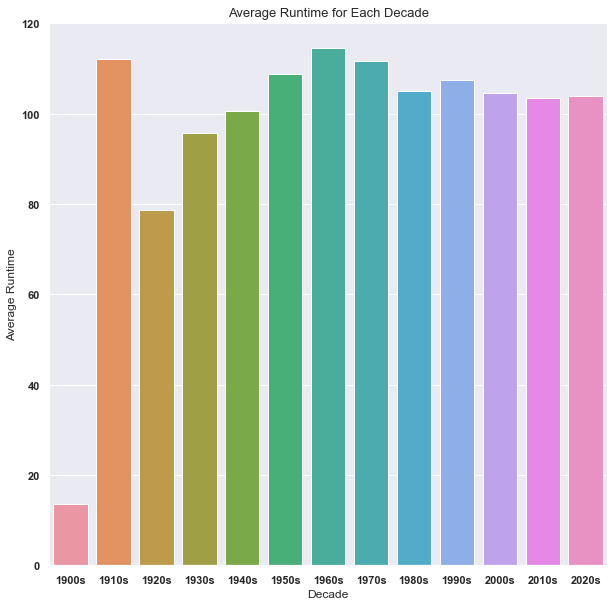

In [48]:
temp_df = movies

temp_df = temp_df.sort_values(by=['decade'], ascending=True)
df_by_runtime = temp_df.groupby(['decade']).runtime.mean().reset_index()
ax = sns.barplot(x=df_by_runtime['decade'], y=df_by_runtime['runtime'])
ax.set_title("Average Runtime for Each Decade",fontsize=13)
ax.set_xlabel("Decade",fontsize=12)
ax.set_ylabel("Average Runtime",fontsize=12)

plt.show()

## 6. Creating a profit column
This will allow us to gain more insight than focusing just on revenue and budget.
Following analysis can be done: 
- Most and Least Profitable movies
- Correlation between Profit and Budget
- Correlation between Profit and Revenue generated by the movie

In [49]:
movies["Profit"] = movies["revenue"] - movies["budget"]

In [50]:
#printing out the movie based on profit
most_profitable_movie = movies[movies["Profit"] == movies["Profit"].max()]["title"].to_string(index=False)
least_profitable_movie = movies[movies["Profit"] == movies["Profit"].min()]["title"].to_string(index=False)
print("Most Profitable Movie: ",most_profitable_movie)
print("Least Profitable Movie: ",least_profitable_movie)

Most Profitable Movie:  Avatar
Least Profitable Movie:  The Tomorrow War


## 7. Top 10 movies based on profit

We see that most of the top 10 movies also come under movies with most budget or revenue. 

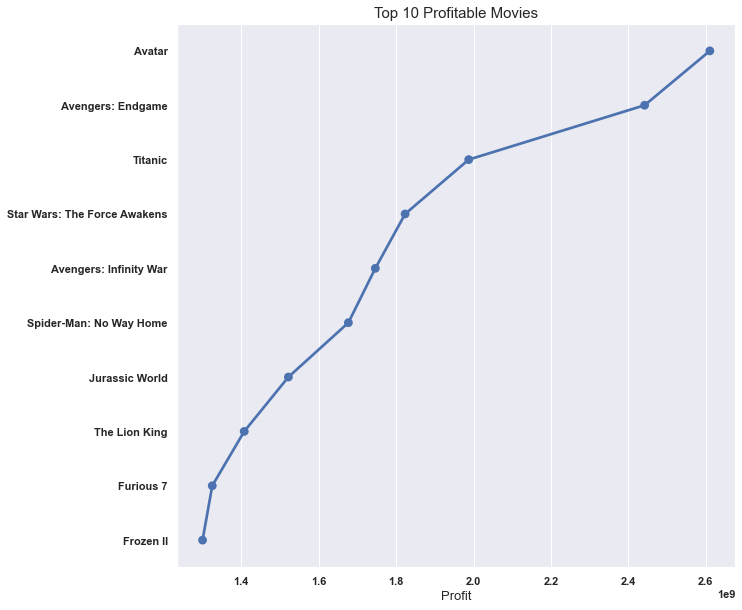

In [51]:
data_temp = pd.DataFrame(movies['Profit'].sort_values(ascending = False))
data_temp['title'] = movies['title']
data = list(map(str,(data_temp['title'])))
x = list(data[:10])
y = list(data_temp['Profit'][:10])

#make a plot usinf pointplot for top 10 profitable movies.
ax = sns.pointplot(x=y,y=x)

#setup the figure size
sns.set(rc={'figure.figsize':(10,5)})
#setup the title and labels of the plot.
ax.set_title("Top 10 Profitable Movies",fontsize = 15)
ax.set_xlabel("Profit",fontsize = 13)
sns.set_style("darkgrid")

## 8. Correlation of Profit, Revenue and Budget

The analysis answers the following questions:

- Do movies with high revenue give higher budget associated with them?
- Does higher Budget indicate higher Profit?
- Is higher revenue correlated with higher budget?

Correlation Between Profit And Revenue :  0.9812379639717466
Correlation Between Profit And Budget :  0.5999209496319169
Correlation Between Revenue And Budget :  0.742917093108258


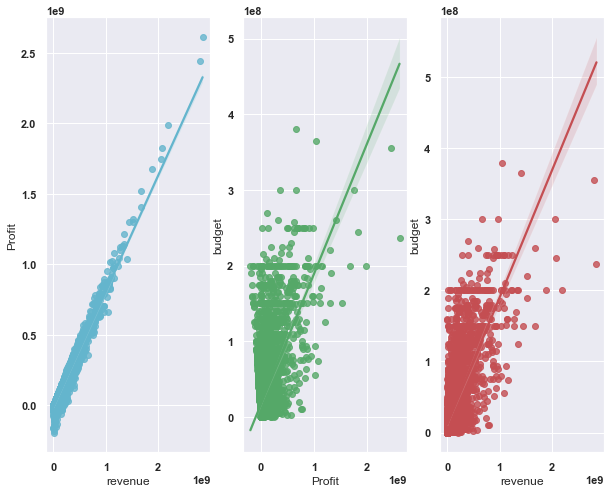

In [52]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(10,8)) 
sns.set(rc={'figure.figsize':(6,4)})
sns.set_style("darkgrid")

#Profit Vs Revenue

sns.regplot(x=movies['revenue'], y=movies['Profit'],color='c',ax=ax1)

#set the title and labels of the figure
ax.set_title("Profit Vs Revenue",fontsize=13)
ax.set_xlabel("Profit",fontsize=12)
ax.set_ylabel("Revenue",fontsize=12)


#find the correlation using 'corr()' function.
data_corr = movies.corr()
print("Correlation Between Profit And Revenue : ",data_corr.loc['Profit','revenue'])


sns.regplot(x=movies['Profit'], y=movies['budget'],color='g',ax=ax2)

#set the title and labels of the figure
ax.set_title("Profit Vs Budget",fontsize=13)
ax.set_xlabel("Profit",fontsize=12)
ax.set_ylabel("Budget",fontsize=12)

print("Correlation Between Profit And Budget : ",data_corr.loc['Profit','budget'])

sns.regplot(x=movies['revenue'], y=movies['budget'],color='r',ax=ax3)

#set the title and labels of the figure
ax.set_title("Revenue Vs Budget",fontsize=13)
ax.set_xlabel("Revenue",fontsize=12)
ax.set_ylabel("Budget",fontsize=12)

print("Correlation Between Revenue And Budget : ",data_corr.loc['revenue','budget'])

plt.show()

<AxesSubplot:>

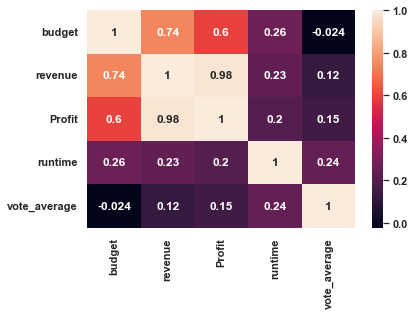

In [53]:
df_corr = movies[["budget","revenue","Profit","runtime","vote_average"]]
corr = df_corr.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values,annot=True)

## Observations and Insights:
- Revenue and Budget are strongly correlated in a postive direction. This means that higher revenue does indicate higher profit
- Profit and Budget are correlated in a postive direction but the correlation is not strong. This means that higher budget does not alone influence profit
- Revenue and Profit are strongly postively correlated with a score of 0.98. Higher revenue does indicate higher profit.

Note: Correlation does not imply causation

## 9. Top 10 production Companies

We can see that the top production houses are:
- Warner Bros Pictures
- Universal Pictures
- Paramount
- Columbia Pictures

Text(0.5, 1.0, 'Top Companies')

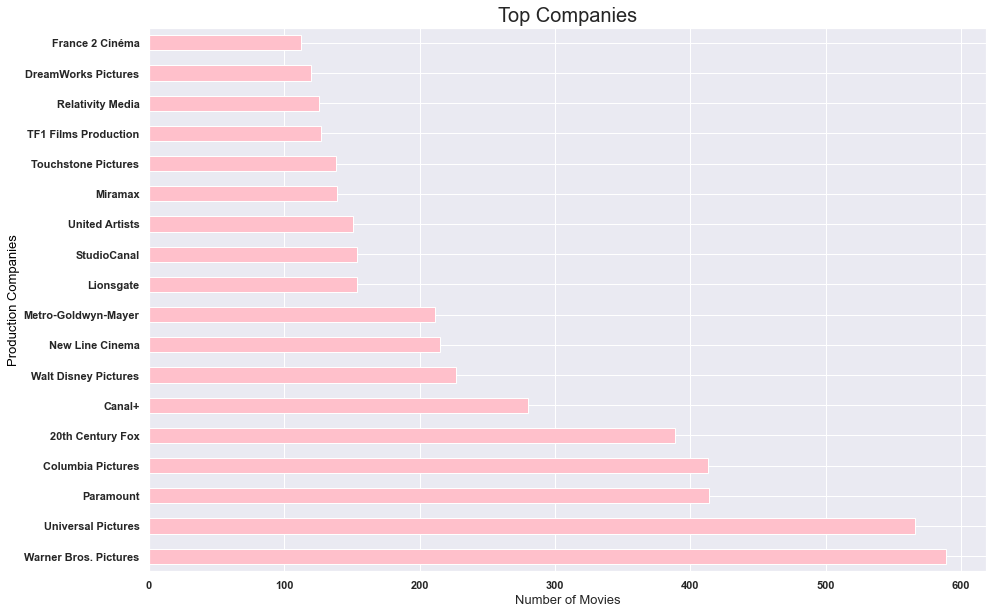

In [54]:
count_prod = split_string('production_companies')
count_prod = count_prod[0:18]
count_prod.head()

plt_prod = count_prod.plot(kind="barh",color="pink")
plt_prod.figure.set_size_inches(15, 10)

plt_prod.set_ylabel('Production Companies', color = 'black', fontsize = '13')
plt_prod.set_xlabel('Number of Movies', fontsize = '13')

plt.title("Top Companies",size=20)

## 10. Movie Season Peak

The analysis below shows that:
- The average profit for films in 1930 saw a spike, but the trend shows that average profit goes upwards as the years progess with maximum being the 2000s. The dip at the end can be explained by lack of data about newer movies since it is the current year.
- However, on futher analysis we can see that the dataset contains less movies in the earlier decades. This can also be a major reason for the lesser overall profit
- Maximum average profit is in the months of May, June, July followed by November and December. 

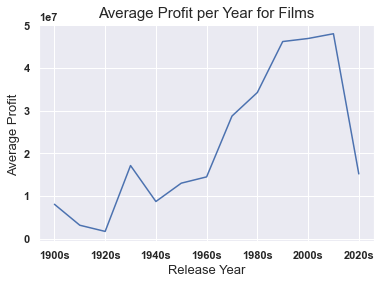

In [55]:
movies.groupby('decade')['Profit'].mean().plot()

plt.title("Average Profit per Year for Films",fontsize = 15)
plt.xlabel('Release Year',fontsize = 13)
plt.ylabel('Average Profit ',fontsize = 13)

sns.set(rc={'figure.figsize':(10,5)})
sns.set_style("whitegrid")

<AxesSubplot:>

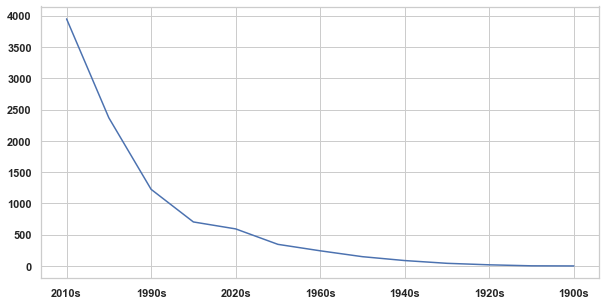

In [56]:
movies["decade"].value_counts().plot()

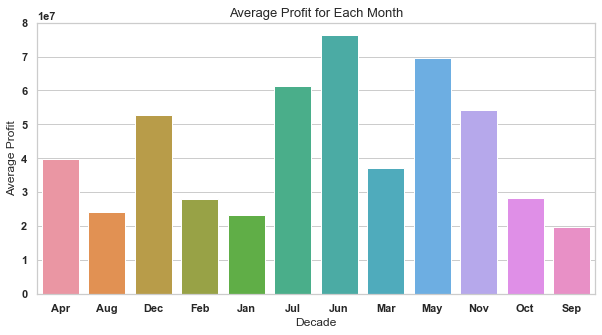

In [57]:
temp_df = movies

temp_df = temp_df.sort_values(by=['Release_month'], ascending=True)
df_by_profit = temp_df.groupby(['Release_month']).Profit.mean().reset_index()
ax = sns.barplot(x=df_by_profit['Release_month'], y=df_by_profit['Profit'])
ax.set_title("Average Profit for Each Month",fontsize=13)
ax.set_xlabel("Decade",fontsize=12)
ax.set_ylabel("Average Profit",fontsize=12)

plt.show()

## 11. Checking the popular words in movie overview

The wordcloud of movie overview shows that the words that appear majority of times are 'family','life','crime', 'NRI'and 'prison'. We can gain some insight into this. There are many movies based on a family rather than an individual. Similarly, the top rated movies might contain bollywood movies where the terms like 'NRI',meaning Non Residential Indian, are popular. The words like 'crime' and 'prision' match with my previous analysis and belong to thriller or action genra.

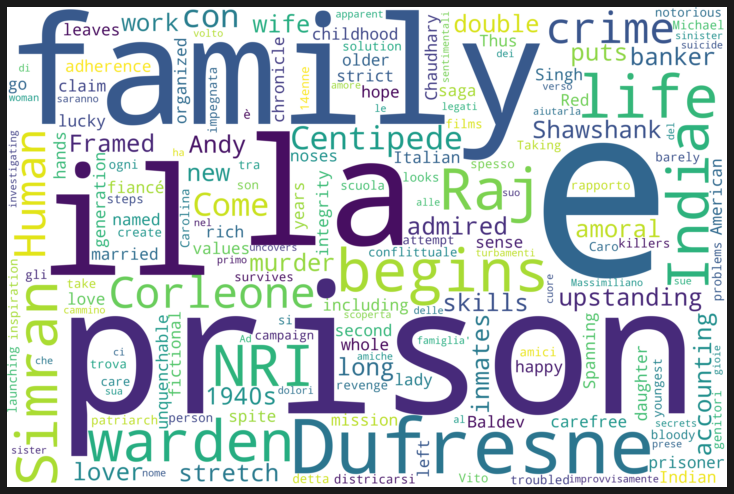

In [58]:
#! pip install wordcloud
from wordcloud import WordCloud,STOPWORDS
text = movies.overview.values
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'white',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (10, 10),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

## 12. Countries producting the maximum number of movies

Text(0.5, 1.0, 'Top Companies')

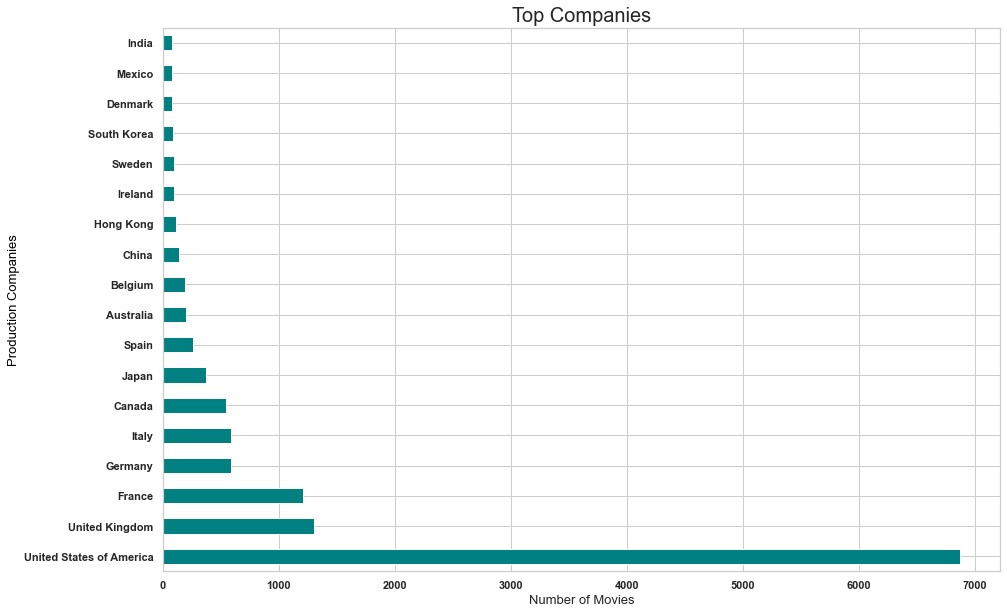

In [59]:
count_prod = split_string('production_countries')
count_prod = count_prod[0:18]
count_prod.head()

plt_prod = count_prod.plot(kind="barh",color="teal")
plt_prod.figure.set_size_inches(15, 10)

plt_prod.set_ylabel('Production Companies', color = 'black', fontsize = '13')
plt_prod.set_xlabel('Number of Movies', fontsize = '13')

plt.title("Top Companies",size=20)

<AxesSubplot:>

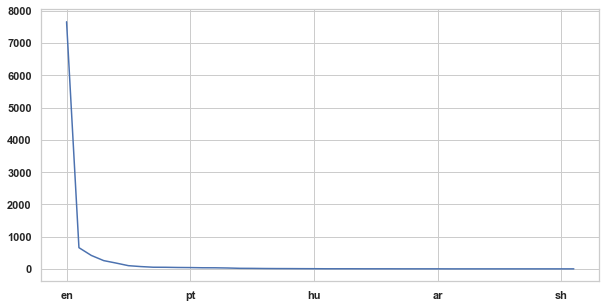

In [60]:
movies["original_language"].value_counts().plot()

We can see that the maximum top rated movies of TMDB dataset are produced by USA, followed by UK and France. This can be because of English movies being popular worldwide, or because of the community contributing to TMDB.

## Conclusion
- Drama is the most popular genre of top rated movies, following by comedy, thriller and action.
- None of the popular movies come under the movies with longest runtime. Thus, optimal runtime is important for success of a movie.
- May, June, July, November and December are most suitable months for releasing movies, if you wish to earn more profit.
- Warner Bros, Universal Pictures and Paramount Pictures and columbia prictures production companies earn more life time profit than other production companies.
- The maximum number of movies are produced by USA and UK. This shows that the chances of a film being popular is greater if it is produced by Hollywood.
- Movies with higher budgets have shown a corresponding increase in the revenues.
- The dataset has lesser data about older movies and hence, the analysis is not 100% accurate. 

## Challenges Faced and Future Scope of Analysis
- The first challege was to find out the information about top rated movies. I tried extracting the information from the [top rated movies](https://developers.themoviedb.org/3/movies/get-top-rated-movies) URL. However, it does not contain information like genre, runtime, budget, revenue, production companies and other important features. As a result, I had to take the movie ids from the 'top rated movies' and extract further information from [movies](https://developers.themoviedb.org/3/movies/get-movie-details) URL. 
- I did not face any difficulty in fetching the data since the query restrictions per day weren't less. 
- The TMDB data contains information about cast and crew as well but there is no column to indicate if the cast members are the leads in a movie. As a result, scraping that was not possible. However, the analysis on number of cast member can be done as future scope of this project.
- Further analysis can also be done on finding answers to questions like: 
    - Are all movies released in a country belong to the same language?
    - Are there any top rated movies belonging to a country where the `spoken_language` of film is not the same as native language?
- Also, we can extract data about [popular movies](https://developers.themoviedb.org/3/movies/get-popular-movies) to compare it with the top rated movies